# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.cluster import KMeans

# Import Data

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTU9LHclwOw2Vmiff8akR1-nRke1jL7iQMl7-huld_MzYsNl1NG-SiHR7IRagEKJgKDVy6NTEEOgxiM/pub?output=csv')
df

,break_start,break_end,nights,num_guests,num_returns,returns_percentage,chs_to_date,actively_happy,happy,neutral,unhappy,actively_unhappy,actively_happy_perc,happy_perc,neutral_perc,unhappy_perc,actively_unhappy_perc,break_chs_score
0,09/10/2020,12/10/2020,3,297,202,0.68,92,152,33,13,4,0,0.75,0.16,0.60,0.20,0.00,91
1,12/10/2020,16/10/2020,4,286,223,0.78,93,187,23,10,3,0,0.84,0.10,0.40,0.20,0.00,94
2,16/10/2020,19/10/2020,3,329,239,0.73,93,190,45,4,0,0,0.79,0.19,0.20,0.00,0.00,94
3,19/10/2020,23/10/2020,4,237,200,0.84,94,178,17,3,0,2,0.89,0.19,0.02,0.00,0.01,94
4,24/10/2020,28/10/2020,4,459,342,0.75,94,288,43,10,1,0,0.84,0.13,0.03,0.00,0.00,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,15/01/2022,17/01/2022,2,432,274,0.63,96,241,26,4,3,0,0.88,0.10,0.02,0.01,0.00,96
65,17/01/2022,19/01/2022,2,223,163,0.73,96,145,15,0,2,1,0.89,9.20,0.00,1.20,0.60,96
66,15/01/2022,19/01/2022,4,387,289,0.75,96,258,30,1,0,0,89.34,10.40,0.30,0.00,0.00,97
67,21/01/2022,24/01/2022,3,599,411,0.69,96,362,38,3,4,1,88.70,9.30,0.70,1.00,0.20,96


# Basic Analysis

In [3]:
round(df.describe().T, 4)

,count,mean,std,min,25%,50%,75%,max
nights,69.0,3.4348,0.6296,2.00,3.00,4.00,4.00,4.0
num_guests,69.0,562.2899,138.6352,223.00,489.00,601.00,651.00,819.0
num_returns,69.0,415.9420,105.0005,163.00,374.00,436.00,489.00,569.0
returns_percentage,69.0,0.7417,0.0845,0.50,0.69,0.75,0.79,1.0
chs_to_date,69.0,94.3478,1.0823,92.00,93.00,95.00,95.00,96.0
actively_happy,69.0,348.4638,94.1452,145.00,307.00,369.00,420.00,501.0
happy,69.0,52.9130,21.7200,12.00,39.00,54.00,66.00,116.0
neutral,69.0,7.6667,5.7616,0.00,4.00,6.00,11.00,22.0
unhappy,69.0,2.8986,8.9066,0.00,0.00,1.00,3.00,74.0
actively_unhappy,69.0,1.0580,1.3600,0.00,0.00,0.00,2.00,5.0


## Splitting features and target

In [4]:
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]

In [5]:
X

,nights,num_guests,num_returns,returns_percentage,chs_to_date,actively_happy,happy,neutral,unhappy,actively_unhappy,actively_happy_perc,happy_perc,neutral_perc,unhappy_perc,actively_unhappy_perc
0,3,297,202,0.68,92,152,33,13,4,0,0.75,0.16,0.60,0.20,0.00
1,4,286,223,0.78,93,187,23,10,3,0,0.84,0.10,0.40,0.20,0.00
2,3,329,239,0.73,93,190,45,4,0,0,0.79,0.19,0.20,0.00,0.00
3,4,237,200,0.84,94,178,17,3,0,2,0.89,0.19,0.02,0.00,0.01
4,4,459,342,0.75,94,288,43,10,1,0,0.84,0.13,0.03,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,2,432,274,0.63,96,241,26,4,3,0,0.88,0.10,0.02,0.01,0.00
65,2,223,163,0.73,96,145,15,0,2,1,0.89,9.20,0.00,1.20,0.60
66,4,387,289,0.75,96,258,30,1,0,0,89.34,10.40,0.30,0.00,0.00
67,3,599,411,0.69,96,362,38,3,4,1,88.70,9.30,0.70,1.00,0.20


## Chi Feature Selection

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature',f'Chi\N{SUPERSCRIPT TWO} Score']  #naming the dataframe columns
print(featureScores.nlargest(15,f'Chi\N{SUPERSCRIPT TWO} Score'))  #print 10 best features

                  Feature  Chi² Score
8                 unhappy  718.160000
10    actively_happy_perc  650.978279
1              num_guests  489.767808
5          actively_happy  460.794658
6                   happy  326.484936
2             num_returns  300.685375
7                 neutral  185.554348
11             happy_perc   32.365859
9        actively_unhappy   30.011644
13           unhappy_perc    5.474211
12           neutral_perc    2.418565
0                  nights    2.253376
14  actively_unhappy_perc    2.222324
4             chs_to_date    0.356152
3      returns_percentage    0.114024


## Feature Importance Selection

[0.04350794 0.0647302  0.06593519 0.06564952 0.05345873 0.08155908
 0.09300093 0.09216205 0.06281844 0.03870733 0.12086764 0.09046205
 0.05966835 0.04360958 0.02386297]


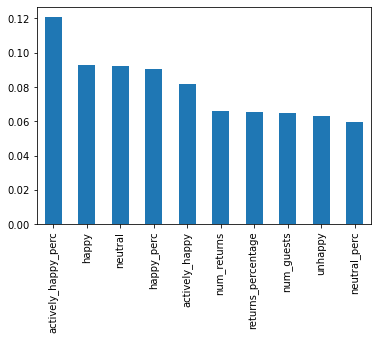

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

## Correlation Matrix with Heatmap

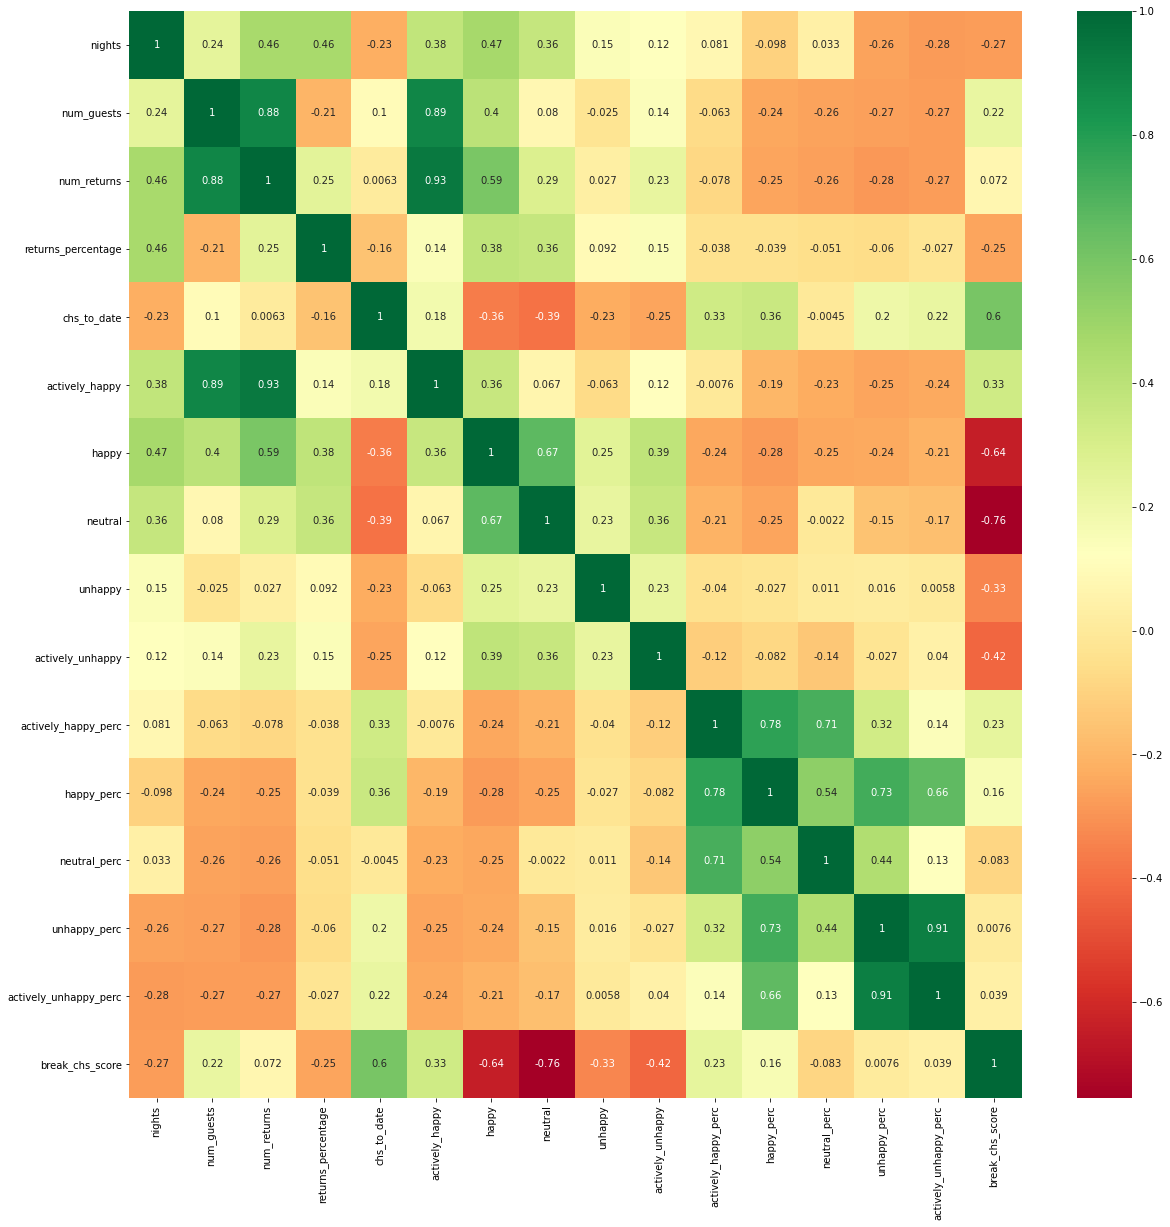

In [8]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# KMeans

In [9]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df.iloc[:,2:-1])
    distortions.append(kmeanModel.inertia_)

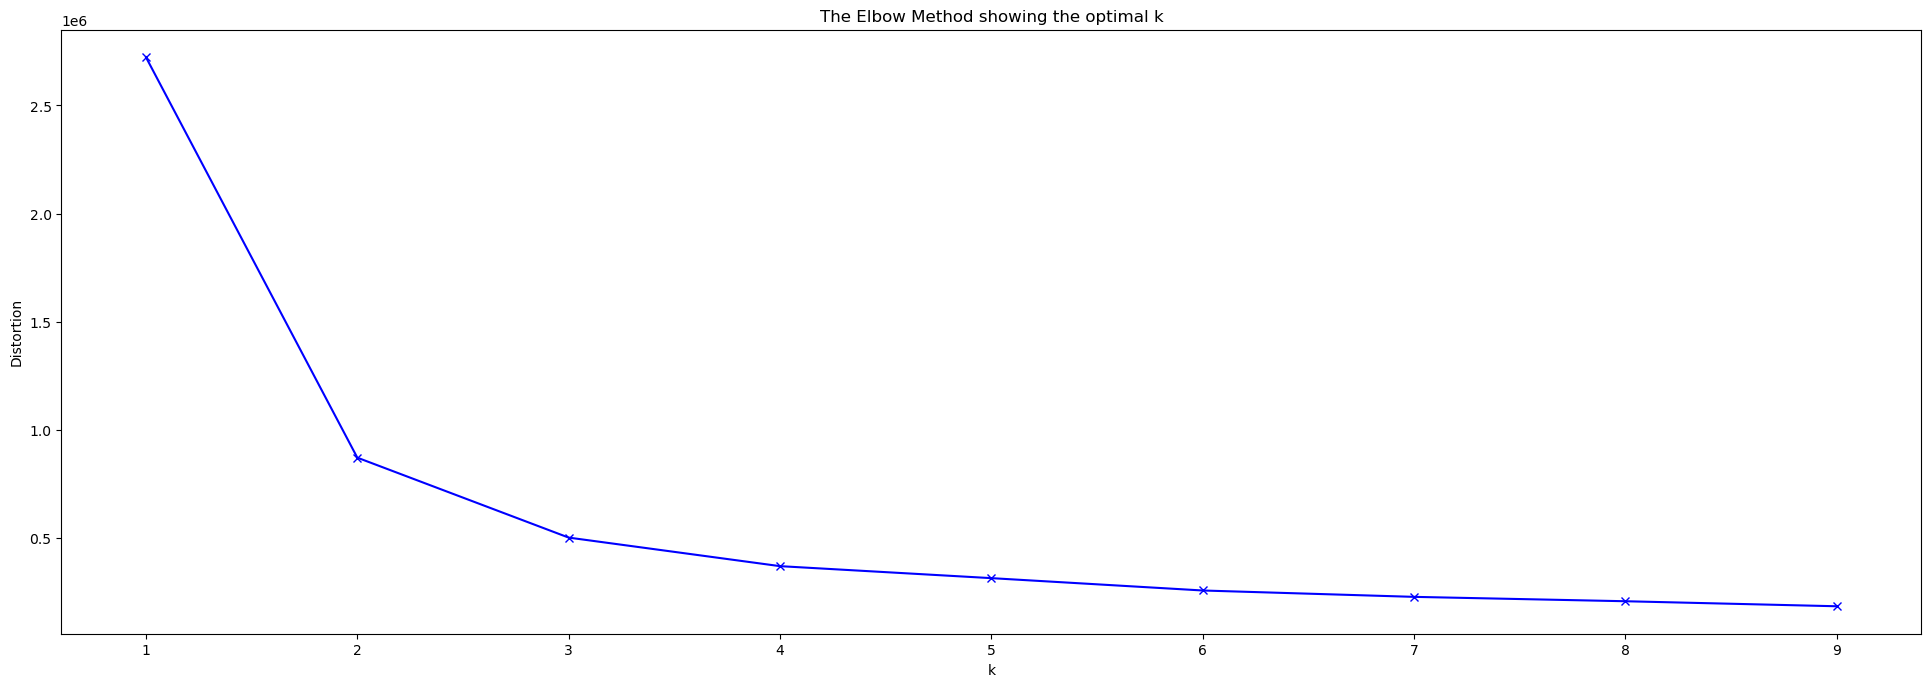

In [11]:
plt.figure(figsize=(24,8), dpi = 100)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df.iloc[:,2:-1])

fig = px.scatter(df, x = 'num_returns', y = 'num_guests', size='num_guests', hover_data=['nights', 'actively_happy_perc'],
                 symbol = 'nights', color = 'num_guests', width=1900, height=800, trendline_color_override='black')
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.005,
    font = dict(size = 20),
    bordercolor="Black",
    borderwidth=1
))
fig.show()

# Linear Regression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.33, random_state = 7)

In [14]:
y_train

19    94
6     91
11    93
0     91
44    97
7     93
48    95
4     95
38    95
39    96
62    98
26    97
42    97
46    95
67    96
8     92
66    97
14    95
57    96
23    93
25    96
47    96
Name: break_chs_score, dtype: int64

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [16]:
reg.score(X_train, y_train)

0.9688561551767799

In [17]:
preds = reg.predict(X_test)

In [18]:
print(f'Predicted value - {preds[1]}')
print(f'Actual value - {y_test[1]}')
print(f'MSE - {metrics.mean_squared_error(y_test, preds)}')

Predicted value - 97.40233107139863
Actual value - 94
MSE - 3855.3236904908103


In [19]:
print(reg.intercept_)
print(reg.coef_)

119.16251069633012
[-1.53999192e-01 -1.32521092e-02  2.50951086e-02 -9.15646724e+00
 -1.61512807e-01 -9.49157046e-03  4.08101846e-02 -1.80987672e-01
 -8.97692358e-02 -4.64663435e-01  4.08289994e+00 -3.54935759e+01
  1.48906115e+01 -5.64221270e+01  6.97094261e+01]


In [20]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
nights,-0.153999
num_guests,-0.013252
num_returns,0.025095
returns_percentage,-9.156467
chs_to_date,-0.161513
actively_happy,-0.009492
happy,0.040810
neutral,-0.180988
unhappy,-0.089769
actively_unhappy,-0.464663
